In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv(r'C:\Users\Emre\Desktop\Datasets\Binary Classification with a Bank Dataset\train.csv')
test = pd.read_csv(r'C:\Users\Emre\Desktop\Datasets\Binary Classification with a Bank Dataset\test.csv')

'''
train.csv - the training dataset; y is the binary target
test.csv - the test dataset; your objective is to predict the probability y for each row
sample_submission.csv - a sample submission file in the correct format
'''

'\ntrain.csv - the training dataset; y is the binary target\ntest.csv - the test dataset; your objective is to predict the probability y for each row\nsample_submission.csv - a sample submission file in the correct format\n'

In [4]:
train.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
test.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [6]:
train.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
train.duplicated().sum()

np.int64(0)

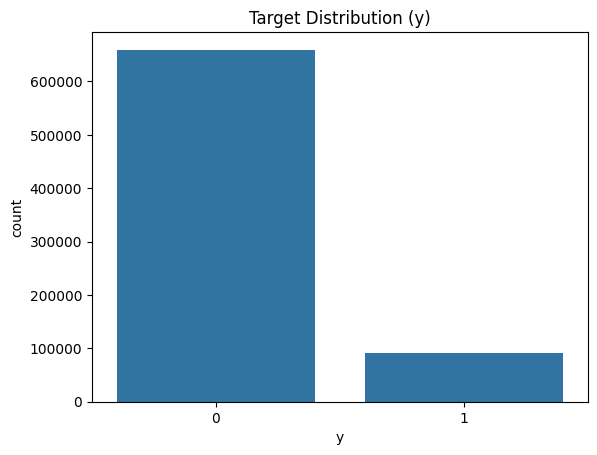

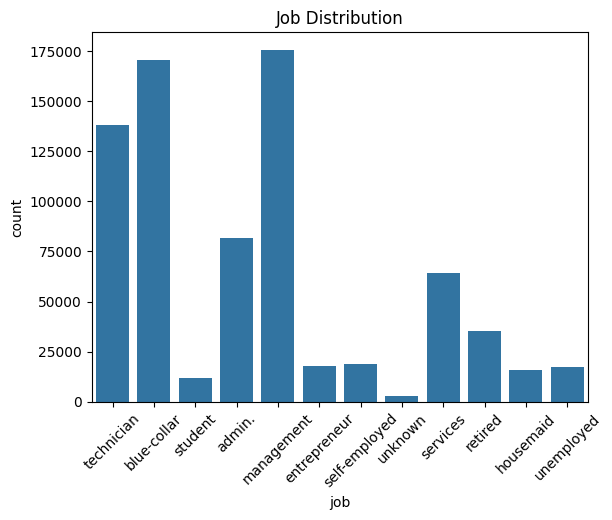

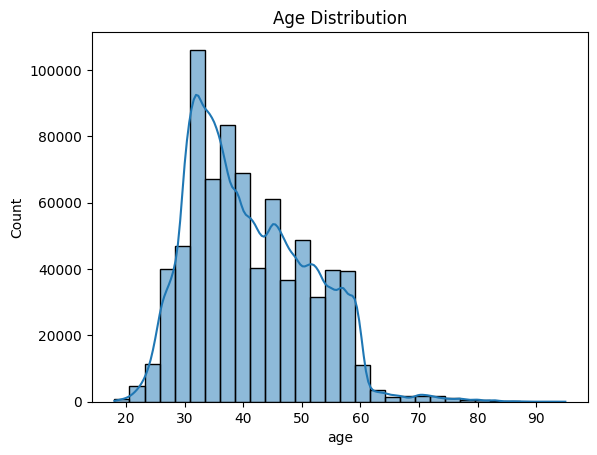

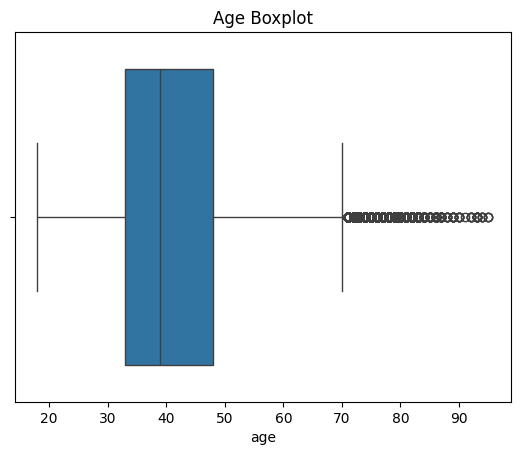

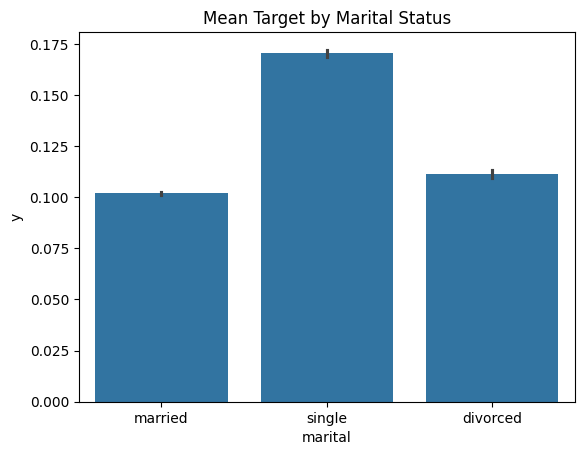

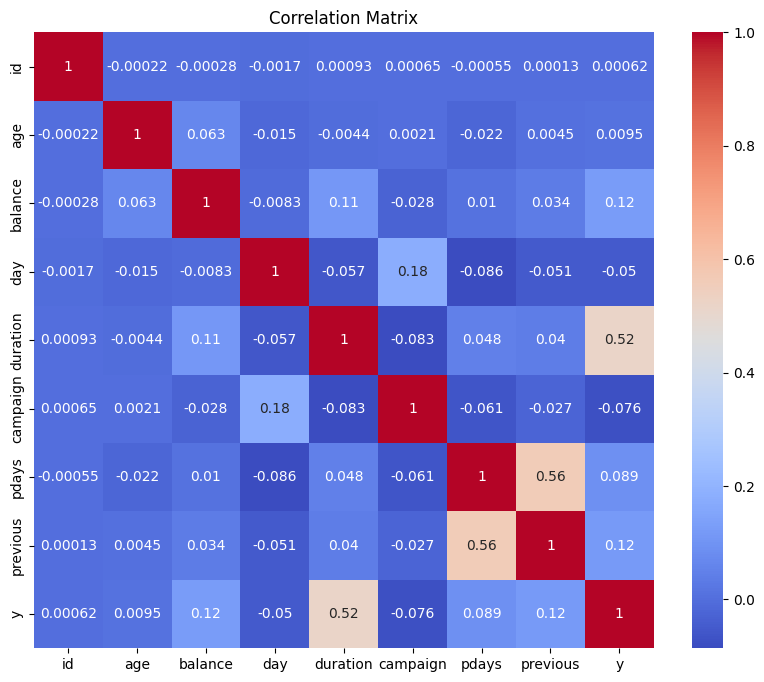

In [8]:
# Hedef değişkenin dağılımı
sns.countplot(x='y', data=train)
plt.title('Target Distribution (y)')
plt.show()

# Kategorik bir sütunun dağılımı (örnek: job)
sns.countplot(x='job', data=train)
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()

# Sürekli bir sütunun dağılımı ve boxplot (örnek: age)
sns.histplot(train['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='age', data=train)
plt.title('Age Boxplot')
plt.show()

# Kategorik değişkene göre hedef değişkenin ortalaması (örnek: marital)
sns.barplot(x='marital', y='y', data=train)
plt.title('Mean Target by Marital Status')
plt.show()

# Korelasyon matrisi (sayısal sütunlar için)
corr = train.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in columns:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    print(f'Label encoded {col}:', train[col].unique())

Label encoded job: [ 9  1  8  0  4  2  6 11  7  5  3 10]
Label encoded marital: [1 2 0]
Label encoded marital: [1 2 0]
Label encoded education: [1 0 2 3]
Label encoded education: [1 0 2 3]
Label encoded default: [0 1]
Label encoded default: [0 1]
Label encoded housing: [0 1]
Label encoded housing: [0 1]
Label encoded loan: [0 1]
Label encoded loan: [0 1]
Label encoded contact: [0 2 1]
Label encoded contact: [0 2 1]
Label encoded month: [ 1  6  8  3  0  9  5  4 10  7 11  2]
Label encoded month: [ 1  6  8  3  0  9  5  4 10  7 11  2]
Label encoded poutcome: [3 1 0 2]
Label encoded poutcome: [3 1 0 2]


In [11]:
train.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   id         750000 non-null  int64
 1   age        750000 non-null  int64
 2   job        750000 non-null  int64
 3   marital    750000 non-null  int64
 4   education  750000 non-null  int64
 5   default    750000 non-null  int64
 6   balance    750000 non-null  int64
 7   housing    750000 non-null  int64
 8   loan       750000 non-null  int64
 9   contact    750000 non-null  int64
 10  day        750000 non-null  int64
 11  month      750000 non-null  int64
 12  duration   750000 non-null  int64
 13  campaign   750000 non-null  int64
 14  pdays      750000 non-null  int64
 15  previous   750000 non-null  int64
 16  poutcome   750000 non-null  int64
 17  y          750000 non-null  int64
dtypes: int64(18)
memory usage: 103.0 MB


In [13]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,3,0
1,1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,3,0
3,3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,3,0
4,4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,3,1


In [14]:
# StandardScaler kodu iptal edildi.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# feature_cols = [col for col in train.columns if col not in ['id', 'y']]
# train[feature_cols] = scaler.fit_transform(train[feature_cols])
# test[feature_cols] = scaler.transform(test[feature_cols])
# print('Tüm özellikler (id hariç) ölçeklendi.')

In [15]:
train.tail()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
749995,749995,29,7,2,1,0,1282,0,1,2,4,5,1006,2,-1,0,3,1
749996,749996,69,5,0,2,0,631,0,0,0,19,1,87,1,-1,0,3,0
749997,749997,50,1,1,1,0,217,1,0,0,17,0,113,1,-1,0,3,0
749998,749998,32,9,1,1,0,-274,0,0,0,26,1,108,6,-1,0,3,0
749999,749999,42,9,1,1,0,1559,0,0,0,4,1,143,1,1,7,0,0


In [16]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,1,1,1,0,1397,1,0,2,21,8,224,1,-1,0,3
1,750001,44,4,1,2,0,23,1,0,0,3,0,586,2,-1,0,3
2,750002,36,6,1,0,0,46,1,1,0,13,8,111,2,-1,0,3
3,750003,58,1,1,1,0,-1380,1,1,2,29,8,125,1,-1,0,3
4,750004,28,9,2,1,0,1950,1,0,0,22,5,181,1,-1,0,3


In [17]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(columns=['id', 'y'])
y_train = train['y']
X_test = test.drop(columns=['id'])

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Test seti için olasılık tahmini
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Sonuçları sample_submission formatında kaydet
submission = test[['id']].copy()
submission['y'] = y_pred_proba
submission.to_csv('sample_submission_logreg.csv', index=False)
print('Tahminler sample_submission_logreg.csv dosyasına kaydedildi.')

c:\Users\Emre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tahminler sample_submission_logreg.csv dosyasına kaydedildi.


In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Eğitim verisi üzerinde tahmin
y_train_pred = model.predict(X_train)

# Accuracy skoru
acc = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", acc)

# Detaylı sınıflandırma raporu
print(classification_report(y_train, y_train_pred))

Train Accuracy: 0.9012893333333334
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    659512
           1       0.64      0.41      0.50     90488

    accuracy                           0.90    750000
   macro avg       0.78      0.69      0.72    750000
weighted avg       0.89      0.90      0.89    750000

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    659512
           1       0.64      0.41      0.50     90488

    accuracy                           0.90    750000
   macro avg       0.78      0.69      0.72    750000
weighted avg       0.89      0.90      0.89    750000



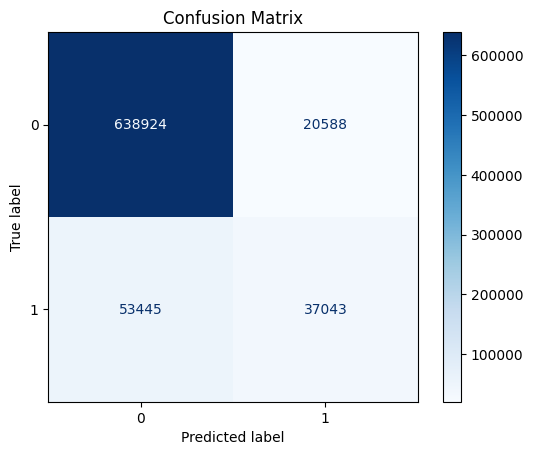

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Eğitim verisi üzerinde tahmin
y_train_pred = model.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()